In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import model_selection
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras import regularizers as reg
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score

Using TensorFlow backend.


In [2]:
url = "heart.csv"
cleveland = pd.read_csv(url)
print('Shape of DataFrame: {}'.format(cleveland.shape))

Shape of DataFrame: (1025, 14)


In [3]:
a=cleveland[~cleveland.isin(['?'])]
a.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
a=a.dropna(axis=0)
print(a.loc[1000:])

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1000   64    1   0       145   212    0        0      132      0      2.0   
1001   42    1   0       140   226    0        1      178      0      0.0   
1002   66    1   0       112   212    0        0      132      1      0.1   
1003   52    1   0       108   233    1        1      147      0      0.1   
1004   51    0   2       140   308    0        0      142      0      1.5   
1005   55    0   0       128   205    0        2      130      1      2.0   
1006   58    1   2       140   211    1        0      165      0      0.0   
1007   56    1   3       120   193    0        0      162      0      1.9   
1008   42    1   1       120   295    0        1      162      0      0.0   
1009   40    1   0       152   223    0        1      181      0      0.0   
1010   51    1   0       140   299    0        1      173      1      1.6   
1011   45    1   1       128   308    0        0      170      0      0.0   

In [5]:
print(a.shape)
print(a.dtypes)

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [6]:
a=a.apply(pd.to_numeric)
print(a.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [7]:
a.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


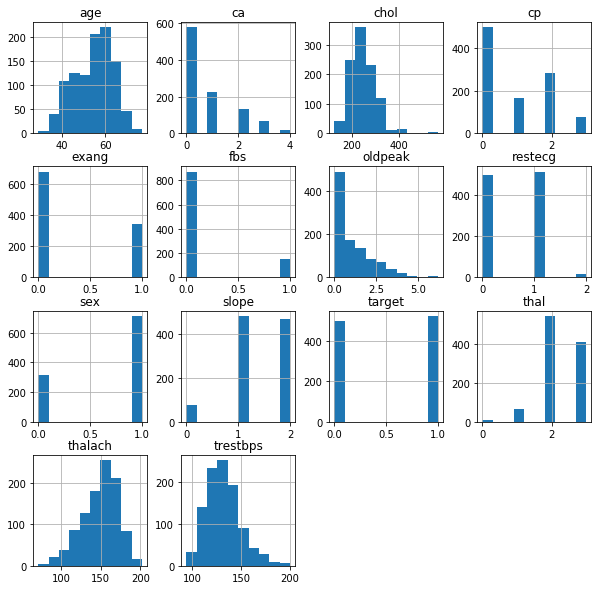

In [8]:
a.hist(figsize=(10,10))
plt.show()

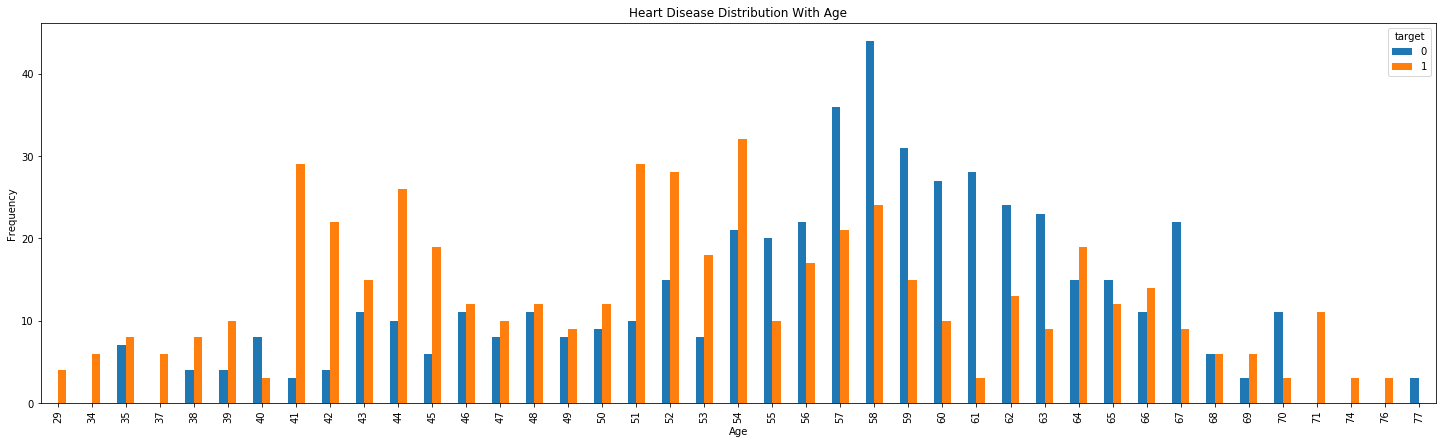

In [9]:
pd.crosstab(a.age,a.target).plot(kind="bar",figsize=(25,7))
plt.title('Heart Disease Distribution With Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

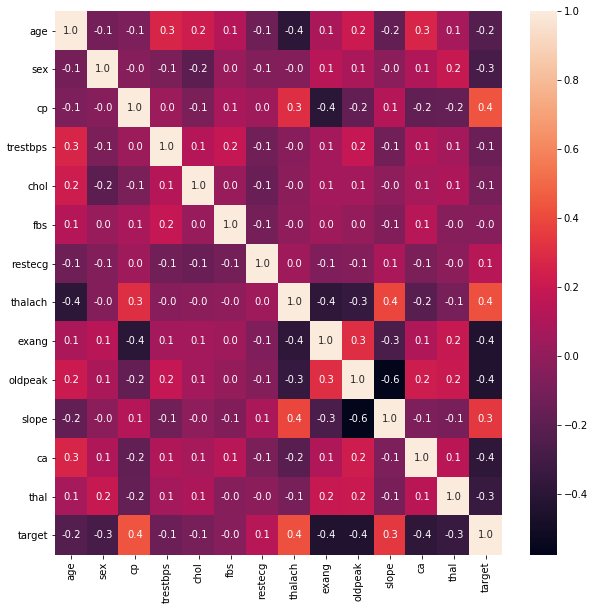

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(a.corr(),annot=True,fmt='0.1f')
plt.show()

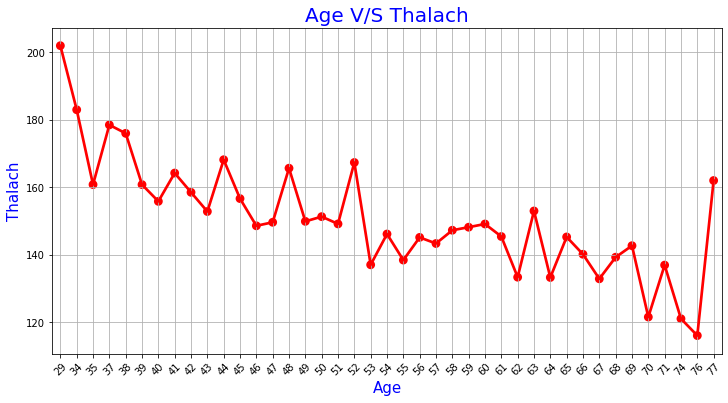

In [11]:
age_unique=sorted(a.age.unique())
age_thalach_values=a.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(a[a['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(12,6))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize=15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize=15,color='blue')
plt.title('Age V/S Thalach',fontsize=20,color='blue')
plt.grid()
plt.show()

In [12]:
X=np.array(a.drop(['target'],1))
Y=np.array(a['target'])

In [13]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [14]:
mean=X.mean(axis=0)
X-=mean
std=X.std(axis=0)
X/=std

In [15]:
X[:2]

array([[-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
        -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
         0.99543334,  1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542,  0.4791073 , -0.83386117,
         2.38733039, -1.00404855,  0.2559679 ,  1.40392824,  1.72713707,
        -2.24367514, -0.73197147,  1.08985168]])

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, stratify=Y, random_state=42, test_size = 0.2)
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

In [17]:
y_train=to_categorical(y_train,num_classes=None)
y_test=to_categorical(y_test,num_classes=None)
print(y_train.shape)
print(y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [18]:
X_train[0]

array([ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
        2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
       -0.6241209 ,  2.17981673, -0.52212231])

In [19]:
def create_model():
    model=Sequential()
    model.add(Dense(16,input_dim=13,kernel_initializer='normal',kernel_regularizer=reg.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2,activation='softmax'))
    adam=Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model
model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=10)

Train on 820 samples, validate on 205 samples
Epoch 1/50
820/820 [==============================] - 0s 456us/step - loss: 0.5761 - accuracy: 0.7598 - val_loss: 0.4928 - val_accuracy: 0.8195
Epoch 2/50
820/820 [==============================] - 0s 166us/step - loss: 0.4463 - accuracy: 0.8256 - val_loss: 0.4060 - val_accuracy: 0.8049
Epoch 3/50
820/820 [==============================] - 0s 241us/step - loss: 0.3955 - accuracy: 0.8585 - val_loss: 0.3684 - val_accuracy: 0.8341
Epoch 4/50
820/820 [==============================] - 0s 259us/step - loss: 0.3603 - accuracy: 0.8585 - val_loss: 0.3511 - val_accuracy: 0.8488
Epoch 5/50
820/820 [==============================] - 0s 237us/step - loss: 0.3500 - accuracy: 0.8524 - val_loss: 0.3399 - val_accuracy: 0.8488
Epoch 6/50
820/820 [==============================] - 0s 255us/step - loss: 0.3437 - accuracy: 0.8695 - val_loss: 0.3330 - val_accuracy: 0.8390
Epoch 7/50
820/820 [==============================] - 0s 189us/step - loss: 0.3388 - accur

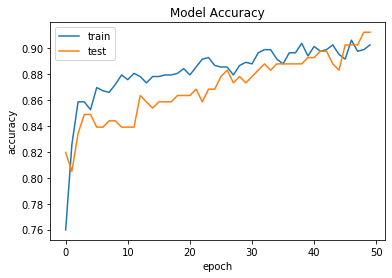

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

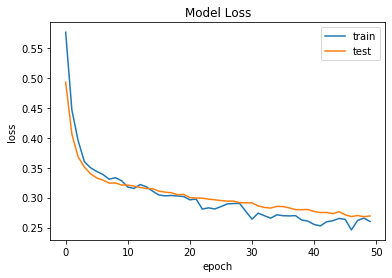

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [23]:
print(Y_train_binary[:20])

[0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0]


In [24]:
def create_binary_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=reg.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=reg.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                224       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Train on 820 samples, validate on 205 samples
Epoch 1/50
820/820 [==============================] - 1s 656us/step - loss: 0.6687 - accuracy: 0.7402 - val_loss: 0.6307 - val_accuracy: 0.8195
Epoch 2/50
820/820 [==============================] - 0s 285us/step - loss: 0.5708 - accuracy: 0.8171 - val_loss: 0.5103 - val_accuracy: 0.8146
Epoch 3/50
820/820 [==============================] - 0s 263us/step - loss: 0.4628 - accuracy: 0.8329 - val_loss: 0.4172 - val_accuracy: 0.8049
Epoch 4/50
820/820 [==============================] - 0s 281us/step - loss: 0.4045 - accuracy: 0.8439 - val_loss: 0.3777 - val_accuracy: 0.8244
Epoch 5/50
820/820 [==============================] - 0s 302us/step - loss: 0.3939 - accuracy: 0.8451 - val_loss: 0.3591 - val_accuracy: 0.8293
Epoch 6/50
820/820 [==============================] - 0s 271us/step - loss: 0.3668 - accuracy: 0.8683 - val_loss: 0.3455 - val_accuracy: 0.8439
Epoch 7/50
820/820 [==============================] - 0s 274us/step - loss: 0.3722 - accur

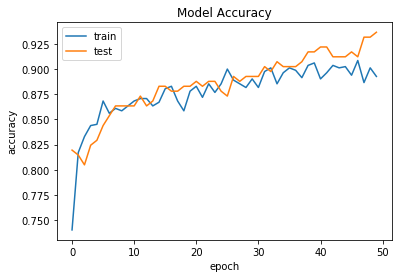

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

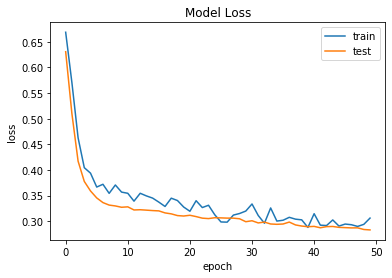

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [28]:
categorical_pred = to_categorical(np.argmax(model.predict(X_test), axis=1))

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

Results for Categorical Model
0.9121951219512195
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       100
           1       0.89      0.94      0.92       105

   micro avg       0.91      0.91      0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205
 samples avg       0.91      0.91      0.91       205



In [29]:
from sklearn.metrics import classification_report, accuracy_score
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

Results for Binary Model
0.9365853658536586
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.93      0.94      0.94       105

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



In [30]:
###EXampLE TesT CasE###
arr=np.array([[52,1,2,138,223,0,1,169,0,0,2,4,2]])
arr=arr.reshape(len(arr), -1)
prediction=model.predict(arr)
if prediction is 0:
    print("No Heart Problem")
else :
    print("Heart Problem, Need to Consult Doctor")

Heart Problem, Need to Consult Doctor
